收集

In [115]:
import pandas as pd
import numpy as np
import json
import tweepy
import requests
import timeit
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [116]:
tweet_archive=pd.read_csv('twitter-archive-enhanced.csv')
tweet_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [117]:
tweet_id=tweet_archive['tweet_id']

In [4]:
consumer_key = xx
consumer_secret = xx
access_token = xx
access_secret = xx

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth,wait_on_rate_limit=True,wait_on_rate_limit_notify=True) 

In [7]:
with open('tweet_json.txt','w') as file:
    start = timeit.timeit()
    for id in tweet_id:
        try:
            tweet_content=api.get_status(id,tweet_mode='extended',wait_on_rate_limit=True,wait_on_rate_limit_notify=True)
            json.dump(tweet_content._json, file)
            file.write('\n')
        except:
            print("Error: " + str(id))
    end = timeit.timeit()
    print end - start

Error: 888202515573088257
Error: 886054160059072513
Error: 873697596434513921
Error: 869988702071779329
Error: 866816280283807744
Error: 861769973181624320
Error: 860981674716409858
Error: 855245323840757760
Error: 845459076796616705
Error: 842892208864923648
Error: 839290600511926273
Error: 837012587749474308
Error: 829011960981237760
Error: 827228250799742977
Error: 802247111496568832
Error: 775096608509886464
Error: 728653952833728512
Error: 687826841265172480
Error: 683449695444799489
Error: 677895101218201600
Error: 673689733134946305
Error: 671896809300709376
0.00283101122757


In [8]:
file.close()

In [118]:
tweet_list=[]
with open('tweet_json.txt','r') as f:
    for row in f:
        json_dict= json.loads(row)  
        to_append= {
            'tweet_id':json_dict['id'],
            'retweet_count':json_dict['retweet_count'],
            'favorite_count':json_dict['favorite_count']
        }
        tweet_list.append(to_append)
tweet_gathered =pd.DataFrame(tweet_list, columns=['tweet_id','retweet_count','favorite_count'])

In [119]:
#使用reguest下载image-predictions.tsv文件
url='https://raw.githubusercontent.com/udacity/new-dand-advanced-china/master/%E6%95%B0%E6%8D%AE%E6%B8%85%E6%B4%97/WeRateDogs%E9%A1%B9%E7%9B%AE/image-predictions.tsv'
response=requests.get(url)

In [121]:
with open('image-predictions.tsv','wb') as i_file:
    i_file.write(response.content)

In [122]:
image =pd.read_csv('image-predictions.tsv',sep='\t')

评估

In [123]:
image

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [124]:
image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.0+ KB


In [125]:
image.head(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [126]:
tweet_gathered.head(10)

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8636,38955
1,892177421306343426,6345,33352
2,891815181378084864,4210,25127
3,891689557279858688,8756,42298
4,891327558926688256,9518,40452
5,891087950875897856,3155,20292
6,890971913173991426,2101,11899
7,890729181411237888,19148,65799
8,890609185150312448,4319,27868
9,890240255349198849,7516,32051


In [127]:
tweet_gathered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2334 entries, 0 to 2333
Data columns (total 3 columns):
tweet_id          2334 non-null int64
retweet_count     2334 non-null int64
favorite_count    2334 non-null int64
dtypes: int64(3)
memory usage: 54.8 KB


In [128]:
tweet_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [129]:
tweet_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [130]:
tweet_archive[tweet_archive['tweet_id'].duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [131]:
tweet_archive.sample(20)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1724,680085611152338944,NaN,NaN,2015-12-24 18:00:19 +0000,"<a href=""https://about.twitter.com/products/tw...",This is by far the most coordinated series of ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/680085611...,12,10,by,None,None,None,None
98,873213775632977920,NaN,NaN,2017-06-09 16:22:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sierra. She's one precious pupper. Abs...,NaN,NaN,NaN,https://www.gofundme.com/help-my-baby-sierra-g...,12,10,Sierra,None,None,pupper,None
874,761292947749015552,NaN,NaN,2016-08-04 20:09:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Bonaparte. He's pupset because it's cloud...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/761292947...,11,10,Bonaparte,None,None,None,None
1737,679530280114372609,NaN,NaN,2015-12-23 05:13:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Guys this really needs to stop. We've been ove...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/679530280...,7,10,a,None,None,None,None
2208,668625577880875008,NaN,NaN,2015-11-23 03:02:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Maks. Maks just noticed something wasn...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668625577...,10,10,Maks,None,None,None,None
1965,673345638550134785,NaN,NaN,2015-12-06 03:38:05 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Gerald. He's a fluffy lil yellow pup. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/673345638...,7,10,Gerald,None,None,None,None
1756,678767140346941444,NaN,NaN,2015-12-21 02:41:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Mia. She makes awful decisions. 8/10 h...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/678767140...,8,10,Mia,None,None,None,None
511,811985624773361665,NaN,NaN,2016-12-22 17:23:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Ted. He accidentally opened the f...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/811985624...,11,10,Ted,None,None,None,None
1164,723179728551723008,NaN,NaN,2016-04-21 16:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jangle. She's addicted to broccoli. It...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/723179728...,8,10,Jangle,None,None,None,None
1437,697242256848379904,NaN,NaN,2016-02-10 02:14:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Oakley. He has a massive tumor growing...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/697242256...,10,10,Oakley,None,None,None,None


In [132]:
tweet_archive['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [133]:
tweet_archive['name'].sort_values()

1035            Abby
1021            Abby
938              Ace
1933            Acro
1327           Adele
1934           Aiden
77               Aja
480            Akumi
820               Al
875           Albert
1954          Albert
144            Albus
412            Albus
1115         Aldrick
2046       Alejandro
374        Alexander
1189    Alexanderson
486              Alf
2238           Alfie
661            Alfie
367            Alfie
1616           Alfie
858            Alfie
51              Alfy
201            Alice
1701           Alice
1495           Amber
1334         Ambrose
2078             Amy
2195          Amélie
            ...     
852               my
988              not
335              not
1747      officially
1206             old
993              one
1936             one
924              one
369              one
2326           quite
169            quite
118            quite
193            quite
2030           space
22              such
2345             the
2346         

**问题** 

质量  
1.tweet_archive中有记录的rating_denominator为0,为无效数据  
2.tweet_archive有2356条数据，收集到的tweet_gathered只有2334条数据，都包含一些没有图片的推特数据，不符合项目要求   
3.tweet_archive中狗狗名字缺失的被设置为None  
4.tweet_archive中狗狗名字错误(a，the...)  
5.tweet_archive中source的内容难以分辨  
6.部分列格式错误，如狗狗地位的格式为str，timestamp格式为str  
7.tweet_archive含有一些转发的tweet数据  
8.tweet_archive中包含一些无用的列

    
整洁度  
1.狗狗的地位：doggo、floofer、pupper，puppo应该作为一列  
2.tweet_archive包含狗狗姓名等信息，而tweet_gathered包含转发数和点赞数，image包含图片预测信息，都不在同一个表格内

## 清理

In [179]:
tweet_archive_clean=tweet_archive.copy()
tweet_gathered_clean=tweet_gathered.copy()
image_clean=image.copy()

#### 定义
选取rating_denominator不为0的记录作为tweet_archive_clean

In [180]:
#代码
tweet_archive_clean=tweet_archive_clean.loc[tweet_archive_clean['rating_denominator'] !=0]

#### 测试

In [181]:
#没有rating_denominator为0的记录
tweet_archive_clean.loc[tweet_archive_clean['rating_denominator']==0]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


#### 定义
选取retweeted_status_id为NaN的记录作为新的tweet_archive_clean  

In [182]:
#代码
tweet_archive_clean=tweet_archive_clean[tweet_archive_clean['retweeted_status_id'].isnull()]

#### 测试

In [183]:
#剩下2174条数据，其中retweeted_status_id全部为null
tweet_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2174 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2174 non-null int64
in_reply_to_status_id         77 non-null float64
in_reply_to_user_id           77 non-null float64
timestamp                     2174 non-null object
source                        2174 non-null object
text                          2174 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2174 non-null int64
rating_denominator            2174 non-null int64
name                          2174 non-null object
doggo                         2174 non-null object
floofer                       2174 non-null object
pupper                        2174 non-null object
puppo                         2174 non-null object
dtypes: float64(4), int64(3), object(1

#### 定义
删除retweeted_status_id，retweeted_status_user_id，retweeted_status_timestamp列

In [140]:
#代码 
tweet_archive_clean=tweet_archive_clean.drop(['retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'],axis=1)

#### 测试

In [141]:
#retweeted_status_id，retweeted_status_user_id，retweeted_status_timestamp列已被删除
list(tweet_archive_clean)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

#### 定义
将name错误的名字设置为None  
将name为None的名字设置为NaN

In [142]:
tweet_archive_clean['name']

0        Phineas
1          Tilly
2         Archie
3          Darla
4       Franklin
5           None
6            Jax
7           None
8           Zoey
9         Cassie
10          Koda
11         Bruno
12          None
13           Ted
14        Stuart
15        Oliver
16           Jim
17          Zeke
18       Ralphus
20        Gerald
21       Jeffrey
22          such
23        Canela
24          None
25          None
26          Maya
27        Mingus
28         Derek
29        Roscoe
30          None
          ...   
2326       quite
2327           a
2328        None
2329        None
2330        None
2331        None
2332        None
2333          an
2334           a
2335          an
2336        None
2337        None
2338        None
2339        None
2340        None
2341        None
2342        None
2343        None
2344        None
2345         the
2346         the
2347           a
2348           a
2349          an
2350           a
2351        None
2352           a
2353          

In [143]:
#代码
tweet_archive_clean.loc[tweet_archive_clean['name'].str.islower(),'name']='None'#将name为小写的设置为None
tweet_archive_clean['name']=tweet_archive_clean['name'].replace('None',np.nan)#将name为None替换为NaN

#### 测试

In [144]:
#没有name为None的记录,没有name为小写的错误记录
print tweet_archive_clean[tweet_archive_clean['name']=='None']
tweet_archive_clean['name'].value_counts()

Empty DataFrame
Columns: [tweet_id, in_reply_to_status_id, in_reply_to_user_id, timestamp, source, text, expanded_urls, rating_numerator, rating_denominator, name, doggo, floofer, pupper, puppo]
Index: []


Lucy         11
Charlie      11
Cooper       10
Oliver       10
Penny         9
Tucker        9
Sadie         8
Lola          8
Winston       8
Daisy         7
Toby          7
Bella         6
Bailey        6
Koda          6
Stanley       6
Bo            6
Jax           6
Oscar         6
Leo           5
Dave          5
Bentley       5
Chester       5
Buddy         5
Milo          5
Rusty         5
Scout         5
Louis         5
Gus           4
Duke          4
Winnie        4
             ..
Richie        1
Huxley        1
Chadrick      1
Jonah         1
Bobb          1
Laika         1
Beya          1
Balto         1
Lili          1
Sandra        1
Meera         1
Cermet        1
Koko          1
Sprinkles     1
Stephan       1
Clyde         1
Livvie        1
Brudge        1
Grizzie       1
Dawn          1
Mollie        1
Teddy         1
Snoop         1
Lenox         1
Jeremy        1
Philbert      1
Zooey         1
Todo          1
Kanu          1
Opie          1
Name: name, Length: 930,

#### 定义
将source替换为直观的各个平台来源

In [145]:
#代码
tweet_archive_clean['source']=tweet_archive_clean['source'].replace('<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>','Twitter for iPhone')
tweet_archive_clean['source']=tweet_archive_clean['source'].replace('<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>','Make a Scene')
tweet_archive_clean['source']=tweet_archive_clean['source'].replace('<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>','Twitter Web Client')
tweet_archive_clean['source']=tweet_archive_clean['source'].replace('<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>','TweetDeck')

#### 测试

In [146]:
#检查source是否被替换
tweet_archive_clean['source'].value_counts()

Twitter for iPhone    2041
Make a Scene            91
Twitter Web Client      31
TweetDeck               11
Name: source, dtype: int64

#### 定义
将doggo floofer pupper puppo归为一列，列名为stage

In [147]:
#代码
tweet_archive_clean=pd.melt(tweet_archive_clean, id_vars=['tweet_id','in_reply_to_status_id','in_reply_to_user_id','timestamp','source','text','expanded_urls','rating_numerator','rating_denominator','name'],value_name='stage')

In [148]:
tweet_archive_clean['stage'].value_counts()

None       8340
pupper      234
doggo        87
puppo        25
floofer      10
Name: stage, dtype: int64

In [149]:
#清除tweet_id和stage都相同的重复数据
tweet_archive_clean_nostage = tweet_archive_clean.drop_duplicates(subset=['tweet_id', 'stage'])
#清除tweet_archive_clean_nostage中tweet_id有重复的全部数据，余下stage为None的数据
tweet_archive_clean_nostage = tweet_archive_clean_nostage.drop_duplicates(subset=['tweet_id'],keep=False)
#选取stage不为None的数据
tweet_archive_clean_stage=tweet_archive_clean[tweet_archive_clean['stage']!='None']
#合并stage为None和有stage的数据，得到无重复的数据，并删除variable
tweet_archive_clean=tweet_archive_clean_stage.append(tweet_archive_clean_nostage)
tweet_archive_clean=tweet_archive_clean.drop('variable',axis=1)

#### 测试

In [150]:
#查看合并后记录数和各列
tweet_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2186 entries, 9 to 2173
Data columns (total 11 columns):
tweet_id                 2186 non-null int64
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2186 non-null object
source                   2186 non-null object
text                     2186 non-null object
expanded_urls            2129 non-null object
rating_numerator         2186 non-null int64
rating_denominator       2186 non-null int64
name                     1395 non-null object
stage                    2186 non-null object
dtypes: float64(2), int64(3), object(6)
memory usage: 204.9+ KB


In [151]:
#查看tweet_id相同的重复项
tweet_archive_clean[tweet_archive_clean.duplicated('tweet_id',keep=False)]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage
165,855851453814013952,NaN,NaN,2017-04-22 18:31:02 +0000,Twitter for iPhone,Here's a puppo participating in the #ScienceMa...,https://twitter.com/dog_rates/status/855851453...,13,10,NaN,doggo
172,854010172552949760,NaN,NaN,2017-04-17 16:34:26 +0000,Twitter for iPhone,"At first I thought this was a shy doggo, but i...",https://twitter.com/dog_rates/status/854010172...,11,10,NaN,doggo
381,817777686764523521,NaN,NaN,2017-01-07 16:59:28 +0000,Twitter for iPhone,"This is Dido. She's playing the lead role in ""...",https://twitter.com/dog_rates/status/817777686...,13,10,Dido,doggo
441,808106460588765185,NaN,NaN,2016-12-12 00:29:28 +0000,Twitter for iPhone,Here we have Burke (pupper) and Dexter (doggo)...,https://twitter.com/dog_rates/status/808106460...,12,10,NaN,doggo
466,802265048156610565,7.331095e+17,4.196984e+09,2016-11-25 21:37:47 +0000,Twitter for iPhone,"Like doggo, like pupper version 2. Both 11/10 ...",https://twitter.com/dog_rates/status/802265048...,11,10,NaN,doggo
473,801115127852503040,NaN,NaN,2016-11-22 17:28:25 +0000,Twitter for iPhone,This is Bones. He's being haunted by another d...,https://twitter.com/dog_rates/status/801115127...,12,10,Bones,doggo
566,785639753186217984,NaN,NaN,2016-10-11 00:34:48 +0000,Twitter for iPhone,This is Pinot. He's a sophisticated doggo. You...,https://twitter.com/dog_rates/status/785639753...,10,10,Pinot,doggo
592,781308096455073793,NaN,NaN,2016-09-29 01:42:20 +0000,Make a Scene,"Pupper butt 1, Doggo 0. Both 12/10 https://t.c...",https://vine.co/v/5rgu2Law2ut,12,10,NaN,doggo
721,759793422261743616,NaN,NaN,2016-07-31 16:50:42 +0000,Twitter for iPhone,"Meet Maggie &amp; Lila. Maggie is the doggo, L...",https://twitter.com/dog_rates/status/759793422...,12,10,Maggie,doggo
780,751583847268179968,NaN,NaN,2016-07-09 01:08:47 +0000,Twitter for iPhone,Please stop sending it pictures that don't eve...,https://twitter.com/dog_rates/status/751583847...,5,10,NaN,doggo


#### 定义
将stage为两种以上的记录的stage值设为multiplestage，删除重复的记录呢

In [152]:
#代码
tweet_archive_clean.loc[tweet_archive_clean.duplicated('tweet_id',keep=False),'stage']='multiplestage'
tweet_archive_clean=tweet_archive_clean.drop_duplicates()

#### 测试

In [153]:
#记录数为2174，stage为multiplestage的记录是12条
tweet_archive_clean.stage.value_counts()

None             1830
pupper            224
doggo              75
puppo              24
multiplestage      12
floofer             9
Name: stage, dtype: int64

#### 定义
选择tweet_archive，tweet_gathered都有的记录整合为一个新的tweet_df  
将tweet_df和image整合

In [159]:
#代码
tweet_df=tweet_archive_clean.merge(tweet_gathered_clean, how='inner', on='tweet_id')
tweet_df=tweet_df.merge(image_clean, how='inner', on='tweet_id')

#### 测试

In [160]:
#查看是否有了三张表的各列
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1987 entries, 0 to 1986
Data columns (total 24 columns):
tweet_id                 1987 non-null int64
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                1987 non-null object
source                   1987 non-null object
text                     1987 non-null object
expanded_urls            1987 non-null object
rating_numerator         1987 non-null int64
rating_denominator       1987 non-null int64
name                     1346 non-null object
stage                    1987 non-null object
retweet_count            1987 non-null int64
favorite_count           1987 non-null int64
jpg_url                  1987 non-null object
img_num                  1987 non-null int64
p1                       1987 non-null object
p1_conf                  1987 non-null float64
p1_dog                   1987 non-null bool
p2                       1987 non-null object
p2_conf                  198

#### 定义
将timestamp格式设置为datetime，狗狗地位的格式设置为category   

In [162]:
#代码
tweet_df.stage = tweet_df.stage.astype('category')
tweet_df.timestamp =pd.to_datetime(tweet_df.timestamp)

#### 测试

In [163]:
#查看timestamp和stage格式是否正确更改
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1987 entries, 0 to 1986
Data columns (total 24 columns):
tweet_id                 1987 non-null int64
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                1987 non-null datetime64[ns]
source                   1987 non-null object
text                     1987 non-null object
expanded_urls            1987 non-null object
rating_numerator         1987 non-null int64
rating_denominator       1987 non-null int64
name                     1346 non-null object
stage                    1987 non-null category
retweet_count            1987 non-null int64
favorite_count           1987 non-null int64
jpg_url                  1987 non-null object
img_num                  1987 non-null int64
p1                       1987 non-null object
p1_conf                  1987 non-null float64
p1_dog                   1987 non-null bool
p2                       1987 non-null object
p2_conf           

#### 定义
根据后续分析需要，创建评分rating列，值为rating_numerator/rating_denominator

In [164]:
#代码
tweet_df['rating']=tweet_df['rating_numerator']/tweet_df['rating_denominator']

#### 测试

In [165]:
#查看rating是否创建成功
tweet_df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,rating
0,890240255349198849,NaN,NaN,2017-07-26 15:59:51,Twitter for iPhone,This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,...,Pembroke,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True,1.4
1,884162670584377345,NaN,NaN,2017-07-09 21:29:42,Twitter for iPhone,Meet Yogi. He doesn't have any important dog m...,https://twitter.com/dog_rates/status/884162670...,12,10,Yogi,...,German_shepherd,0.707046,True,malinois,0.199396,True,Norwegian_elkhound,0.049148,True,1.2
2,872967104147763200,NaN,NaN,2017-06-09 00:02:31,Twitter for iPhone,Here's a very large dog. He has a date later. ...,https://twitter.com/dog_rates/status/872967104...,12,10,NaN,...,Labrador_retriever,0.476913,True,Chesapeake_Bay_retriever,0.174145,True,German_short-haired_pointer,0.092861,True,1.2
3,871515927908634625,NaN,NaN,2017-06-04 23:56:03,Twitter for iPhone,This is Napolean. He's a Raggedy East Nicaragu...,https://twitter.com/dog_rates/status/871515927...,12,10,Napolean,...,komondor,0.974781,True,briard,0.020041,True,swab,0.003228,False,1.2
4,869596645499047938,NaN,NaN,2017-05-30 16:49:31,Twitter for iPhone,This is Scout. He just graduated. Officially a...,https://twitter.com/dog_rates/status/869596645...,12,10,Scout,...,Chihuahua,0.955156,True,toy_terrier,0.008054,True,muzzle,0.006296,False,1.2
5,858843525470990336,NaN,NaN,2017-05-01 00:40:27,Twitter for iPhone,I have stumbled puppon a doggo painting party....,https://twitter.com/dog_rates/status/858843525...,13,10,NaN,...,golden_retriever,0.578120,True,Labrador_retriever,0.286059,True,bloodhound,0.026917,True,1.3
6,855851453814013952,NaN,NaN,2017-04-22 18:31:02,Twitter for iPhone,Here's a puppo participating in the #ScienceMa...,https://twitter.com/dog_rates/status/855851453...,13,10,NaN,...,flat-coated_retriever,0.321676,True,Labrador_retriever,0.115138,True,groenendael,0.096100,True,1.3
7,854010172552949760,NaN,NaN,2017-04-17 16:34:26,Twitter for iPhone,"At first I thought this was a shy doggo, but i...",https://twitter.com/dog_rates/status/854010172...,11,10,NaN,...,English_springer,0.354733,True,collie,0.177538,True,Border_collie,0.131706,True,1.1
8,846514051647705089,NaN,NaN,2017-03-28 00:07:32,Twitter for iPhone,This is Barney. He's an elder doggo. Hitches a...,https://twitter.com/dog_rates/status/846514051...,13,10,Barney,...,golden_retriever,0.650003,True,Leonberg,0.065199,True,Norfolk_terrier,0.052955,True,1.3
9,845397057150107648,NaN,NaN,2017-03-24 22:08:59,Twitter for iPhone,Say hello to Mimosa. She's an emotional suppor...,"https://www.gofundme.com/help-save-a-pup,https...",13,10,Mimosa,...,Dandie_Dinmont,0.394404,True,Maltese_dog,0.186537,True,West_Highland_white_terrier,0.181985,True,1.3


In [166]:
#查看rating值的范围
tweet_df.rating.sort_values()

929       0.000000
509       0.000000
1544      0.100000
1893      0.100000
1728      0.100000
1969      0.100000
1941      0.200000
1957      0.200000
1880      0.200000
1871      0.200000
1716      0.200000
1032      0.200000
1584      0.200000
1461      0.200000
1980      0.200000
1464      0.200000
1598      0.300000
1516      0.300000
1936      0.300000
1098      0.300000
1149      0.300000
1217      0.300000
1837      0.300000
182       0.300000
1819      0.300000
1409      0.300000
1605      0.300000
1349      0.300000
1052      0.300000
1568      0.300000
           ...    
444       1.400000
128       1.400000
484       1.400000
432       1.400000
108       1.400000
431       1.400000
104       1.400000
418       1.400000
99        1.400000
406       1.400000
89        1.400000
28        1.400000
400       1.400000
524       1.400000
538       1.400000
389       1.400000
385       1.400000
573       1.400000
447       1.400000
361       1.400000
55        1.400000
338       1.

In [167]:
#查看rating值的分布情况
tweet_df.rating.value_counts()

1.200000      453
1.000000      419
1.100000      401
1.300000      260
0.900000      150
0.800000       94
0.700000       51
1.400000       35
0.500000       34
0.600000       32
0.300000       19
0.400000       15
0.200000       10
0.100000        4
0.000000        2
2.600000        1
177.600000      1
0.818182        1
3.428571        1
0.636364        1
2.700000        1
42.000000       1
7.500000        1
Name: rating, dtype: int64

#### 定义
rating大部分为0~1.4，仅少数记录（约0.4%）的rating高于该数值，离群值有特殊意义，予以保留
新建一列rating_clean，去除rating的离群值

In [168]:
#代码
tweet_df['rating_clean']=tweet_df['rating']
tweet_df.loc[tweet_df['rating_clean']>1.4,'rating_clean']=np.nan

#### 测试

In [169]:
#查看rating_clean是否创建
tweet_df['rating_clean'].sample(5)

565     1.3
518     1.3
1365    0.4
1510    0.8
1390    1.2
Name: rating_clean, dtype: float64

In [170]:
#查看rating_clean离群值是否设置为None
tweet_df.loc[tweet_df['rating_clean'].isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,rating,rating_clean
111,778027034220126208,NaN,NaN,2016-09-20 00:24:34,Twitter for iPhone,This is Sophie. She's a Jubilant Bush Pupper. ...,https://twitter.com/dog_rates/status/778027034...,27,10,Sophie,...,0.946718,True,cocker_spaniel,0.015950,True,Lhasa,0.006519,True,2.700000,NaN
622,810984652412424192,NaN,NaN,2016-12-19 23:06:23,Twitter for iPhone,Meet Sam. She smiles 24/7 &amp; secretly aspir...,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,...,0.871342,True,Tibetan_mastiff,0.036708,True,Labrador_retriever,0.025823,True,3.428571,NaN
721,786709082849828864,NaN,NaN,2016-10-13 23:23:56,Twitter for iPhone,"This is Logan, the Chow who lived. He solemnly...",https://twitter.com/dog_rates/status/786709082...,75,10,Logan,...,0.467321,True,Persian_cat,0.122978,False,chow,0.102654,True,7.500000,NaN
904,749981277374128128,NaN,NaN,2016-07-04 15:00:45,TweetDeck,This is Atticus. He's quite simply America af....,https://twitter.com/dog_rates/status/749981277...,1776,10,Atticus,...,0.533941,False,sunglasses,0.080822,False,sunglass,0.050776,False,177.600000,NaN
1426,680494726643068929,NaN,NaN,2015-12-25 21:06:00,Twitter for iPhone,Here we have uncovered an entire battalion of ...,https://twitter.com/dog_rates/status/680494726...,26,10,NaN,...,0.438627,True,Samoyed,0.111622,True,Great_Pyrenees,0.064061,True,2.600000,NaN
1711,670842764863651840,NaN,NaN,2015-11-29 05:52:33,Twitter for iPhone,After so many requests... here you go.\n\nGood...,https://twitter.com/dog_rates/status/670842764...,420,10,NaN,...,0.096063,False,accordion,0.094075,False,drumstick,0.061113,False,42.000000,NaN


In [171]:
#保存tweet_df到csv文件
tweet_df.to_csv('twitter_archive_master.csv', encoding='utf-8', index=False)

数据分析及可视化

In [172]:
#选取需要的数据作为分析用的df
df_analysis=tweet_df[['rating_numerator','rating_denominator','retweet_count','favorite_count','stage','rating','rating_clean']]

In [173]:
df_analysis.describe()

,rating_numerator,rating_denominator,retweet_count,favorite_count,rating,rating_clean
count,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1981.000000
mean,12.287368,10.533971,2726.251636,8870.353800,1.169695,1.054192
std,41.570533,7.333532,4708.799323,12578.738279,4.074214,0.219386
min,0.000000,2.000000,13.000000,80.000000,0.000000,0.000000
25%,10.000000,10.000000,609.500000,1929.000000,1.000000,1.000000
50%,11.000000,10.000000,1318.000000,4055.000000,1.100000,1.100000
75%,12.000000,10.000000,3138.000000,11196.500000,1.200000,1.200000
max,1776.000000,170.000000,77699.000000,143898.000000,177.600000,1.400000


转发量（retweet_count）最低推特有13 次转发，最高的有77699 次转发，平均转发量为4708。  
点赞量（favorite_count）最低的推特有80 个点赞，最高的有143898 个点赞，平均点赞数为8870。  
评分（rating）最高的推特得分为177.6，最低为0，去掉离群值以后，平均得分为1.05。

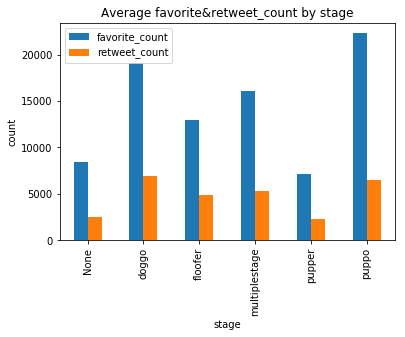

In [174]:
bar_figure=df_analysis.groupby('stage')['favorite_count','retweet_count'].mean().plot(kind='bar')
plt.ylabel('count')
plt.title('Average favorite&retweet_count by stage')
fig = bar_figure.get_figure()
fig.savefig('bar_figure.png')

狗狗的地位对平均转发量和平均点赞量的影响是不同的。  
从平均转发量来看，狗狗地位为puppo 的最高，pupper 最低。  
但从平均点赞量来看，狗狗地位为doggo 的最高，pupper 最低。

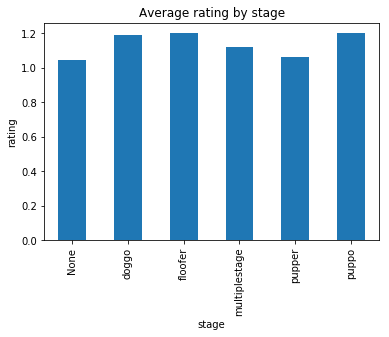

In [175]:
bar_figure_rating=df_analysis.groupby('stage')['rating_clean'].mean().plot(kind='bar')
plt.ylabel('rating')
plt.title('Average rating by stage')
fig = bar_figure_rating.get_figure()
fig.savefig('bar_figure_rating.png')

不同地位的狗狗得到的平均得分差异不大，平均得分最高的是地位为puppo 的狗狗,得分最低的是地位为pupper的狗狗。

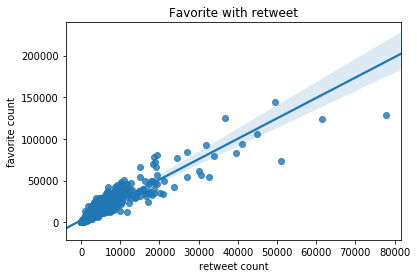

In [176]:
p = sns.regplot(x=df_analysis['retweet_count'], y=df_analysis['favorite_count'])
plt.xlabel('retweet count')
plt.ylabel('favorite count')
plt.title('Favorite with retweet')
fig = p.get_figure()
fig.savefig('scatterplot.png')

散点图的横坐标为转发量（retweet_count），纵坐标为点赞数（favorite_count）。  
从散点的分布来看，转发量（retweet_count）和点赞数（favorite_count）存在一定线性关系，
随着转发量的增加，点赞量也相应增加。